In [1]:
# - Locating missing data/replace with meaningful NaN values
# - Remove records with more than 1 missing value
# - Filling missing continuous values with column mean
# - Filling missing categorical values with column mode
# - Remove outliers using statistical analysis
# - Perform a Label Encoding/One Hot Encoding of the categorical features

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('creditcardapproval.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [5]:
# replace missing values(?) with NaN value
df = df.replace('?', np.nan)
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
#Count non-NA cells
df.count()
# coulumns 2, 7, 10, and 14 are continuous and none of these have NaN values.

0     678
1     678
2     690
3     684
4     684
5     681
6     681
7     690
8     690
9     690
10    690
11    690
12    690
13    677
14    690
15    690
dtype: int64

In [7]:
#axis 1 counts non-NA cells for each row
# the 10 samples below each contain more than a single error and should be removed
nan_vals = dict(df.count(axis=1))
nan_vals = {key:value for (key,value) in nan_vals.items() if value < 15}
nan_vals

{206: 11,
 270: 11,
 330: 11,
 445: 14,
 456: 11,
 479: 13,
 539: 14,
 592: 11,
 601: 13,
 622: 11}

In [8]:
# length of total samples for training/testing
len(df)

690

In [9]:
# drop the erroneous records from the data frame
df = df.drop(index=nan_vals.keys())

In [10]:
# remaining samples for training/testing
len(df)

680

In [11]:
# No missing continuous values; 
#Missing categorical values that we can fill in using the column's most frequent value -- the mode.
fill = pd.Series(df.mode().values.flatten())
df = df.fillna(fill)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [13]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [14]:
#convert the dtypes
df[1] = df[1].astype('float64')
df[13] = df[13].astype('int64')

In [15]:
df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13      int64
14      int64
15     object
dtype: object

In [16]:
df.describe()

,1,2,7,10,13,14
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,31.309824,4.797515,2.255184,2.435294,182.864706,1024.198529
std,11.718569,4.986291,3.360643,4.889825,174.085346,5244.642160
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000,70.000000,0.000000
50%,28.170000,2.855000,1.000000,0.000000,160.000000,5.000000
75%,37.562500,7.500000,2.750000,3.000000,274.500000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


Text(0.5, 1.0, 'Title: Column 1')

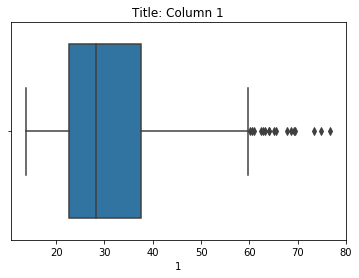

In [17]:
ax = sns.boxplot(df[1])
ax.set_title("Title: Column 1")

Text(0.5, 1.0, 'Title: Column 2')

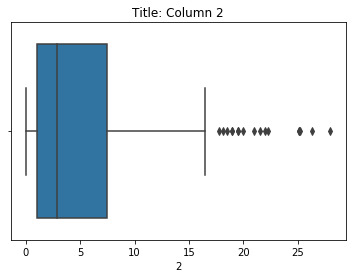

In [18]:
sns.boxplot(df[2]).set_title("Title: Column 2")

Text(0.5, 1.0, 'Title: Column 7')

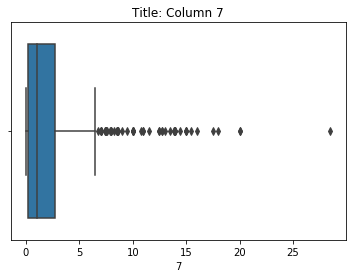

In [19]:
sns.boxplot(df[7]).set_title("Title: Column 7")

Text(0.5, 1.0, 'Title: Column 10')

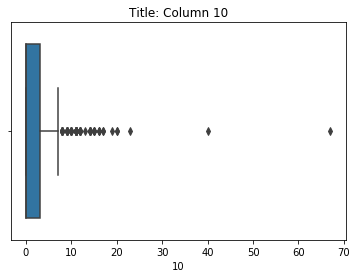

In [20]:
sns.boxplot(df[10]).set_title("Title: Column 10")

Text(0.5, 1.0, 'Title: Column 13')

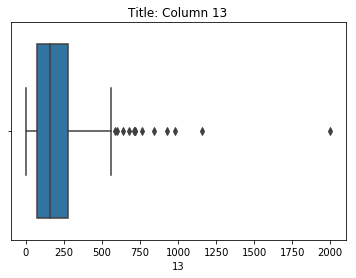

In [21]:
sns.boxplot(df[13]).set_title("Title: Column 13")

Text(0.5, 1.0, 'Title: Column 14')

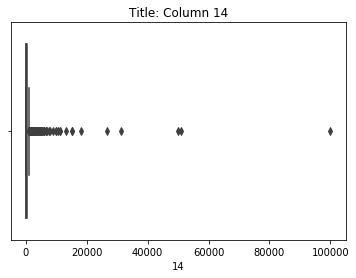

In [22]:
sns.boxplot(df[14]).set_title("Title: Column 14")

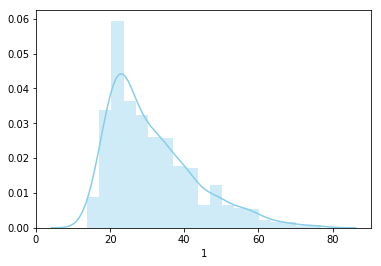

In [23]:
#We can also create a histogram of each input variable to get an idea of the distribution.
#this can help to check Gaussian distribution
#histograms
# df.hist()
# plt.show()
# f, axes = plt.subplots(3, 4, figsize=(7, 7), sharex=True)
# f, axes = plt.subplots(3, 3, figsize=(20, 20), sharex=True)
# sns.distplot( df[1] , color="skyblue", ax=axes[0, 0])
# sns.distplot( df[2] , color="olive", ax=axes[0, 1])
# sns.distplot( df[7] , color="gold", ax=axes[0, 2])
# sns.distplot( df[10] , color="teal", ax=axes[1, 0])
# sns.distplot( df[13] , color="green", ax=axes[1, 1])
# sns.distplot( df[14] , color="red", ax=axes[1, 2])
sns.distplot(df[1] , color="skyblue")

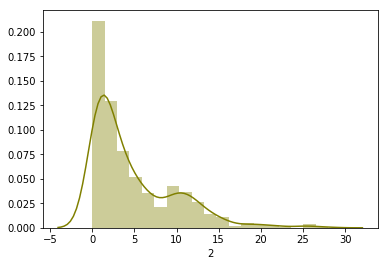

In [24]:
sns.distplot(df[2] , color="olive")

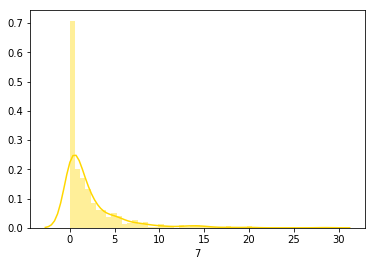

In [25]:
sns.distplot(df[7] ,  color="gold")

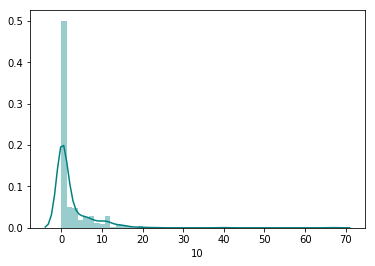

In [26]:
sns.distplot(df[10], color="teal")

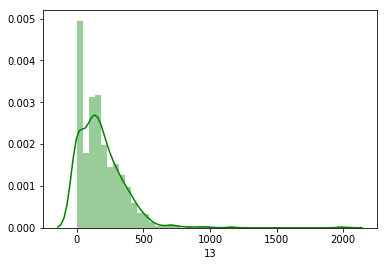

In [27]:
sns.distplot(df[13], color="green")

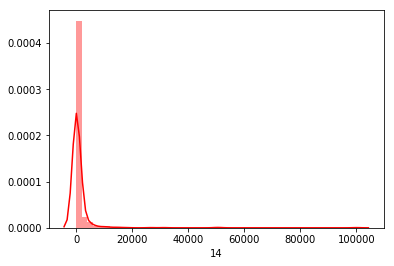

In [28]:
sns.distplot(df[14] , color="red")

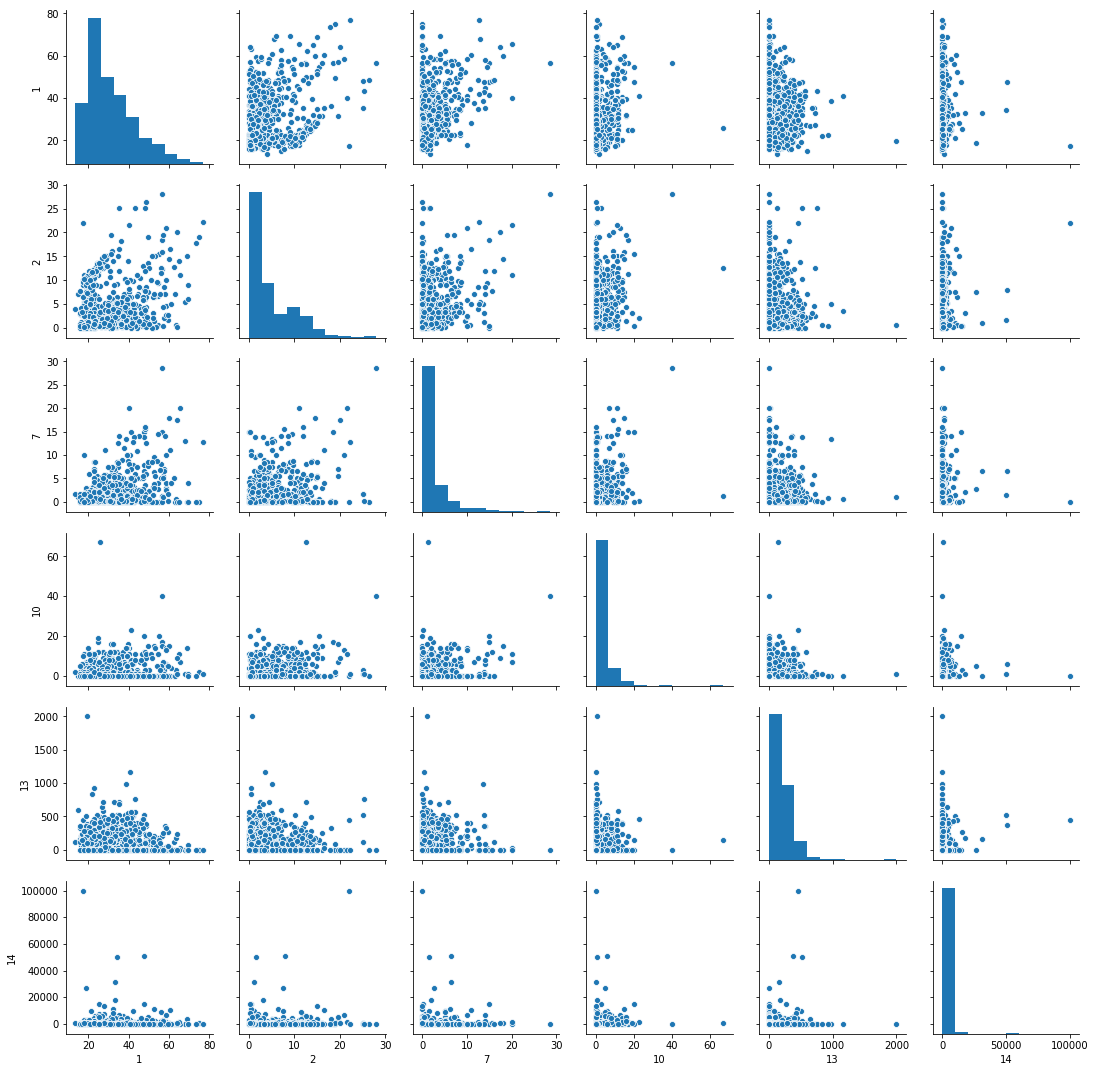

In [29]:
#to know relationships in dataset
sns.pairplot(df);

In [30]:
# remove only TRUE outliers -- those more than 3 stdev's from the mean
df[(df[1] < 3*11.719 + 31.310) &
   (df[2] < 3*4.986 + 4.798) & 
   (df[7] < 3*3.361 + 2.255) & 
   (df[10] < 3*4.890 + 2.435) &
   (df[13] < 3*174.085 + 182.865) &
   (df[14] < 3*5344.642 + 1024.199)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+
10,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,128,0,+


In [31]:
# if we knew something about the labels, we would have a better understanding about how to go about
# removing categorical outliers; however, we are not privileged with this understanding because the
# source of the data and the feature labels are unknown. We would proceed to evaluate the categorical
# outliers by viewing the frequencies of occurence for each value per column like so: df[5].value_counts(),
# but we will not be doing that here.
# df[3].value_counts()

In [32]:
le=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in df:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
         df[col]=le.fit_transform(df[col])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0,0


In [33]:
# Performing a One Hot Encoding of the categorical variables to prepare the data for classification.
# we can do this easily by using the OneHotEncoder from the sklearn.preprocessing module or simply call get_dummies()
# on a pandas data frame. For simplicity, we will use the latter approach.
df = pd.get_dummies(df)


In [34]:
# # now we can simply drop the duplicate output label column
# df = df.drop(columns='15_-')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0,0


In [36]:
# writing the cleaned data set to a new csv file in the data directory
df.to_csv('cleandataset.csv', sep=',')